In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
credit_df = pd.read_csv('CreditRisk.csv')

In [5]:
credit_df.shape

(614, 13)

In [6]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [7]:
credit_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,0


In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [9]:
credit_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [10]:
credit_df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [11]:
credit_df.groupby(['Education', 'Loan_Status']).Education.count()

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
Name: Education, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

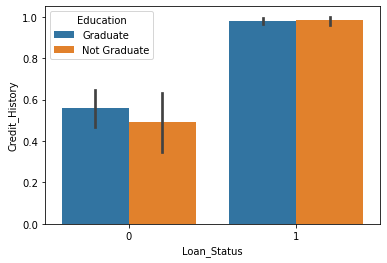

In [12]:
sns.barplot(y = 'Credit_History', x = 'Loan_Status', hue='Education', data = credit_df)

## Fill Null Values

In [13]:
100 * credit_df.isnull().sum() / credit_df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
object_columns = credit_df.select_dtypes(include=['object']).columns
numeric_columns = credit_df.select_dtypes(exclude=['object']).columns

In [15]:
#credit_df.columns[credit_df.dtypes == object]
#credit_df.columns[credit_df.dtypes == object]

In [16]:
for column in object_columns:
    majority = credit_df[column].value_counts().iloc[0]
    credit_df[column].fillna(majority, inplace=True)

In [17]:
for column in numeric_columns:
    mean = credit_df[column].mean()
    credit_df[column].fillna(mean, inplace=True)

In [18]:
# Impute

In [19]:
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [20]:
credit_df.drop('Loan_ID', axis=1, inplace=True)

In [21]:
object_columns = credit_df.select_dtypes(include=['object']).columns

In [22]:
credit_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


## Categorical Columns

In [23]:
credit_df[object_columns].Property_Area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [24]:
credit_df[object_columns].Property_Area.head()

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [25]:
credit_df_dummy = pd.get_dummies(credit_df, columns=object_columns)

In [26]:
# Sklearn - LabelEncoding
# Sklearn - LabelBinarize
# Sklearn - OneHotEncoding

In [27]:
credit_df_dummy.shape

(614, 25)

In [28]:
credit_df_dummy

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_489,Gender_Female,Gender_Male,Married_398,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_500,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,4583,1508.0,128,360.0,1.0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,3000,0.0,66,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,2583,2358.0,120,360.0,1.0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,6000,0.0,141,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71,360.0,1.0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
610,4106,0.0,40,180.0,1.0,1,0,0,1,0,...,0,1,1,0,0,1,0,1,0,0
611,8072,240.0,253,360.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
612,7583,0.0,187,360.0,1.0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1


## Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
X = credit_df_dummy.drop('Loan_Status', axis=1)
y = credit_df_dummy.Loan_Status
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
train_x.shape, test_x.shape

((429, 24), (185, 24))

## Decision Tree

In [32]:
dt_model = DecisionTreeClassifier(max_depth=14)

In [33]:
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=14)

In [34]:
train_y_hat = dt_model.predict(train_x)
test_y_hat = dt_model.predict(test_x)

In [35]:
print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       1.00      1.00      1.00       302

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        65
           1       0.75      0.78      0.77       120

    accuracy                           0.69       185
   macro avg       0.66      0.65      0.66       185
weighted avg       0.69      0.69      0.69       185



In [36]:
dt_model.score(train_x, train_y)

0.9976689976689976

In [37]:
dt_model.score(test_x, test_y)

0.6918918918918919

In [38]:
print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       1.00      1.00      1.00       302

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        65
           1       0.75      0.78      0.77       120

    accuracy                           0.69       185
   macro avg       0.66      0.65      0.66       185
weighted avg       0.69      0.69      0.69       185



In [39]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = train_x,train_y  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
fori, j in enumerate(np.unique(y_set)):  
mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

SyntaxError: invalid syntax (<ipython-input-39-c5ccaaac1b97>, line 10)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(train_x,train_y)

#Predict the response for test dataset
train_y_hat = dt_model.predict(train_x)
test_y_hat = dt_model.predict(test_x)

In [44]:
from sklearn import metrics

In [46]:
print("Accuracy:",metrics.accuracy_score(test_y,test_y_hat))

Accuracy: 0.6918918918918919
